# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [21]:
# Number of houses in the dataset
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = len(city_data.feature_names)

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: ** 
-----
**Crime (crim)- This is the amount of crime in the area per capita, it's going to be more subject to fluctuations in small areas; however this will likely contribute to the price.**

**Rooms (rm) - This is the number of rooms per house, all else being equal this will give us an approximate size of the house and who it was built for, fewer rooms being smaller families**

**Pupil Teach Ratio (ptratio) - This is the number of pupils per teacher in local schools, conventional wisdom is that smaller class sizes result in better student performance - this is of course a fallacy, because smaller class sizes just leads to a greater error so small schools are better represented on the tails of student performance (both the best and worst schools have small class sizes). However, I'm going to go with the greater-fool strategy and bet that few people know that. **

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [98]:
print city_data.feature_names
print CLIENT_FEATURES

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: 11.95, 5.609, 20.2** 

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [46]:
# Put any import statements you need for this code block here
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=1)

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    print(housing_features.shape, housing_prices.shape)
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
except:
    print "Something went wrong with shuffling and splitting the data."

((506, 13), (506,))
Successfully shuffled and split the data!
((354, 13), (354,))
((152, 13), (152,))


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: To avoid overfitting the model to the training data. It's easy to assume that what we see is all there is; however, there can be sample bias or just random error that throws off a really complex model, so we need to compare performance of what we can see with some "new" data we haven't used for training.**

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [49]:
# Put any import statements you need for this code block here
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import recall_score
#from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    
    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print(total_error)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

0.0
Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: I went with the MSE, because we're doing regression so the first four are out and the only really good answers are MSE and MAE since we aren't going to really be able to classify the housing price correctly. Between the two MAE and MSE, trivial solutions are less harshly punished for MAE than for MSE - we want to penalize getting the price way off more heavily than just a little bit of error**

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [87]:
# Put any import statements you need for this code block
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."


Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: Grid Search takes a set of hyperparameters and exhaustively searches through them. It evaluates the performance of the different models and selects the one with the best performance. It's pretty expensive so we need to avoid it one large datasets with a lot of different hyperparameters**

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: Because the search is automatic, there's some danger of a specific (non-general) answer that's prone to overfitting. So, we try train on various separate chunks of data independently to make sure we arrive at a general solution that works well for new cases. It's performed by simply breaking up the data and designating some number of sets as testing, validation, and untouched testing set. The training set is then used to find a model, which is tested against the validation set to ensure generality. As mentioned above, grid search exhaustively evaluates the performance of different models, so we need many data sets to verify the generality of these different models.**

**Because we have much better cases of generality, the more we test on data that hasn't yet been seen, it's benefitial to break the data into several "folds" which are just some k number of subsets and train each model on one fold and test it against k-1 folds, change the training "fold", and repeat.**


# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [92]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([3,4,5,6]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [90]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


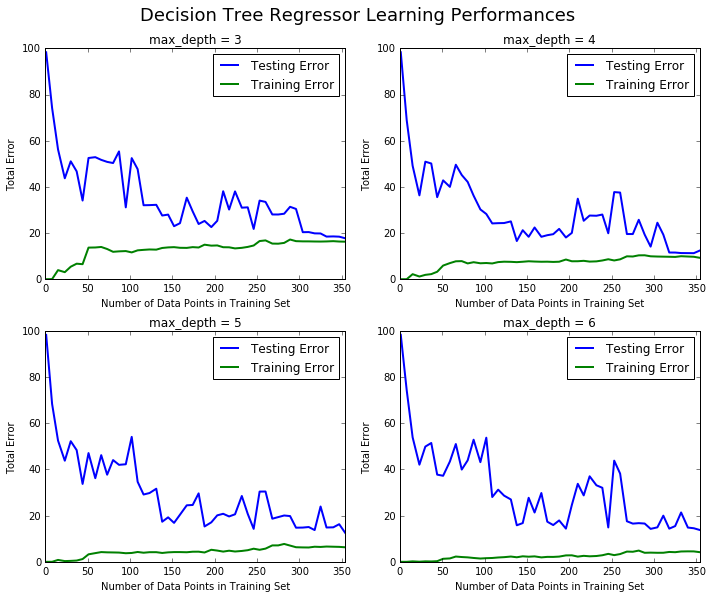

In [93]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: max_depth of 3, as the size of the set increases the training error is converging onto the testing error, and they appear to meet at just under 20(%).**

**By converge I mean the training set error is increasing while the testing set error is decreasing until they appear to reach a limit somewhere beyond 350, slightly off the graph. I would estimate by 400, the error between the two are overlapping. There's always some variation but it appears to be consistently trending downward**

*edit: I changed the outputs to be 3, 4, 5, and 6 instead of the defaults to lend a little more clarity and it appears we see all of them converging (larger test error decreasing while smaller training error increasing) to a range just below an error of 20. Now it seems as though 3, 5, and 6 are notably worse than 4 - which is impressive. However, I still don't trust that 4 is the correct number without substantially more general cases. It just seems like it's too close to call with a difference of 2-3%.*

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: With max_depth of 1 it shows a lot of bias - the model doesn't seem to be complex enough to handle the data with much precision, but with max_depth of 10 it seems it may be variance because the training error hovers around zero, but the testing error is bouncing around 20. Realistically they probably both have the same amount of noise resulting from unaccounted for factors; however max_depth 10 is lacking the bias that max_depth 1 has in addition to this noise.**

--edit--
**It's important to realize that sensitivity and robustness (a general concept related to variance and bias) are inversely proportional. Sensitivity makes something respond to both signal and noise, so a system is too sensitive when the noise plays a large role in the response. We want to increase sensitivity (which is also increasing complexity) only up until the point that the noise becomes a key factor in our results. Robustness on the otherhand, allows us to ignore noise, but if a system is too robust it also ignores the signal making it fairly useless.**

**Every system has both signal and noise in its input but we cannot directly measure in what proportion every time (obviously if we could identify only what was important we just wouldn't observe that) so this needs to be inferred rather than measured. For this reason, generally, as a system's sensitivity increases the error falls until a point, and then begins to rise again as the controller cannot distinguish between signal and noise**

**To make this explanation specific to this assignment, in this lesson, in this class, "bias" is a measure of robustness - whereas "variance" is a measure of sensitivity and although as general concepts they are part of the same concept, we differentiate them here because a high confidence in our systems. We would never acutally know if our noise/error is caused by the data, model, tools, software, or mathematics of our particular case, so the hubris of assuming that some error is caused by a particular thing is like guessing the shape of an ice statue by the puddle it left behind. To say that "this model only has variance" or "this model only has bias" is greatly simplifying the possible sources of error - which is to say this model of view classification control systems is too robust or has a lot of bias. It would really make much more sense to determine the amount of bias/variance with linear regression and determine what percentage of the error is created by which source; however, because all of that would be inference it would be impossible to verify and it too would be a guess. Suffice to say there is no single source of error for any of the models we've seen so far. It seems as though the desired answer key for these problems, wishes this concept  https://en.wikipedia.org/wiki/Sensitivity_analysis to be of a binary classification form.**

** So imagine something of this nature: **

** Infinitely Robust < ---------------------- > Infinitely Sensitive **

** For nearly every case, on the left we ignore signal and on the right we ignore noise, and both will lead to error. Just like in this and every single other question on here erring on the side of robustness/simple-models/low-complexity yields high error (bias) as we are ignoring part of the signal, and erring on the side of sensitive/complex-models/high-complexity yields high error (variance) as we are ignoring part of the noise. **

**Error needs to be minimized**
**Robustness ignores signal -> error(bias)**
**Sensitivity ignores noise -> error(variance)**
**Neither eliminates other sources of noise/error**

Creating a model complexity graph. . . 


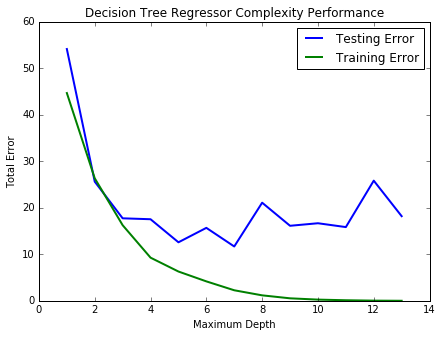

In [67]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

## 5! I guess 5, cause it's a minima - and even though there's no perceptable difference between 5, 6, and 7 because ~1% error could just be noise I guess I have to choose because a range of EXACTLY THE SAME ANSWERS isn't good enough, even though it's a guess

**Why is my ability to see with the error of human vision, compounded with an unknown amount of rounding for pixel alignment, absolutely no gridlines, and an amount of noise that leads to no perceptable benefit between 5-7 being tested here? I choose the minima, but I can't see what that is because this is a terrible visualization with no additional error analysis**

**It very much seems like this is what you want to see:**

|Depth    |Error   |
|----------|----------|
| 1    |Bias(55%)|   
| 2    |Bias(35%)|
| 3    |Bias(18%)|
| 4    |Bias(18%)|
| 5    |Bias(14%)|
| 6    |Variance(16%) - going up therefore variance :P|
| 7    |Bias(13%) - Wait it's going down but it was just going up >.<|
| 8    |Variance(21%) going up must be variance|
| 9    |Bias(19%) - going down must be bias|
|10    |Variance(20%)|
|11    |Bias(19%) - down must be bias, variance can't fall|
|12    |Variance(29%) - Wow, much variance|
|13    |Bias(19%) - Why can't the bias just disappear like your charts?????|

**Overfitting is caused by increase model complexity as a result of the inability to generalize the knowledge from the sample to the population as a whole. It's clear that because of this, somewhere around a max depth of 8, the error in the testing set begins to increase as the error in training data decreases.**

**It's important to realize that sensitivity and robustness (a general concept related to variance and bias) are inversely proportional. Sensitivity makes something respond to both signal and noise, so a system is too sensitive when the noise plays a large role in the response. We want to increase sensitivity (which is also increasing complexity) only up until the point that the noise becomes a key factor in our results. Robustness on the otherhand, allows us to ignore noise, but if a system is too robust it also ignores the signal making it fairly useless.**

**Every system has both signal and noise in its input but we cannot directly measure in what proportion every time (obviously if we could identify only what was important we just wouldn't observe that) so this needs to be inferred rather than measured. For this reason, generally, as a system's sensitivity increases the error falls until a point, and then begins to rise again as the controller cannot distinguish between signal and noise**

**To make this explanation specific to this assignment, in this lesson, in this class, "bias" is a measure of robustness - whereas "variance" is a measure of sensitivity and although as general concepts they are part of the same concept, we differentiate them here because a high confidence in our systems. We would never acutally know if our noise/error is caused by the data, model, tools, software, or mathematics of our particular case, so the hubris of assuming that some error is caused by a particular thing is like guessing the shape of an ice statue by the puddle it left behind. To say that "this model only has variance" or "this model only has bias" is greatly simplifying the possible sources of error - which is to say this model of view classification control systems is too robust or has a lot of bias. It would really make much more sense to determine the amount of bias/variance with linear regression and determine what percentage of the error is created by which source; however, because all of that would be inference it would be impossible to verify and it too would be a guess. Suffice to say there is no single source of error for any of the models we've seen so far. It seems as though the desired answer key for these problems, wishes this concept  https://en.wikipedia.org/wiki/Sensitivity_analysis to be of a binary classification form.**

** So imagine something of this nature: **

** Infinitely Robust < ---------------------- > Infinitely Sensitive **

** For nearly every case, on the left we ignore signal and on the right we ignore noise, and both will lead to error. Just like in this and every single other question on here erring on the side of robustness/simple-models/low-complexity yields high error (bias) as we are ignoring part of the signal, and erring on the side of sensitive/complex-models/high-complexity yields high error (variance) as we are ignoring part of the noise. **

**Error needs to be minimized**
**Robustness ignores signal -> error(bias)**
**Sensitivity ignores noise -> error(variance)**
**Neither eliminates other sources of noise/error**



# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [74]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 4


**Answer: It appears to be in line with my initial impressions with some mild degree of error. This is because overfitting is a real problem, and it's bad - so it's best to avoid it.**

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [82]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer: The predicted value is 21.63, from a max_depth of 4 which is a little bit below the mean and a bit above the median, but within one standard deviation. So, it's very nearly exactly in line with what we would guess to be it's sale price given the mean is a bit above the median but not by much.**

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: I don't speculate in real estate and hate the cold, so I personally would not. However, it seems like a valid way to go about doing that. As far as housing predictions in general, there are some usability concerns and I'd bet in a few weeks I'll have something a little fancier I can use to predict housing prices ;) **

**In all seriousness, I'm pretty confident squared error is the right way to go, big errors in housing price will hurt more and as such those need to be accounted for, but really we would rather place the house slightly high and have to wait a little while longer than underprice the home and miss out on lost profit. I don't know the situation of every home-buyer but the asymettrical payoff wasn't taken into consideration with this model, and really it should. Ideally we want the clearing price, but I know I would rather have to wait and potentially come down a few thousand dollars than walk away with a lot less than I could have gotten because of some error. **

**As far as the presence of outliers, we want still want to err high-side, so unless there are enough outliers to drag the median down (I would argue they are no longer outliers in that case) then between median and mean is exactly where we want to be for a usual-case house**
